This image was floating around the internet to "prove" voter fraud so lets see if we can reproducte their results...
from wikipedia

> "Benford's law, also called the Newcomb–Benford law, the law of anomalous numbers, or the first-digit law, is an observation about the frequency distribution of leading digits in many real-life sets of numerical data. The law states that in many naturally occurring collections of numbers, the leading digit is likely to be small.[1] For example, in sets that obey the law, the number 1 appears as the leading significant digit about 30% of the time, while 9 appears as the leading significant digit less than 5% of the time. If the digits were distributed uniformly, they would each occur about 11.1% of the time.[2] Benford's law also makes predictions about the distribution of second digits, third digits, digit combinations, and so on."

![title](benfordsLaw.png)

In [39]:
import pandas as pd
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt

# downloaded from allegheny elections office site:
# https://results.enr.clarityelections.com/PA/Allegheny/106267/web.264614/#/summary
tree = ET.parse('detail.xml')
root = tree.getroot()

In [85]:
def get_leading_digit_dist(data):
    leading = {1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0}
    
    for index, value in data.items():
        ld = int(str(value)[0])
        if ld != 0:
            leading[ld] = leading[ld] + 1
            
    return leading

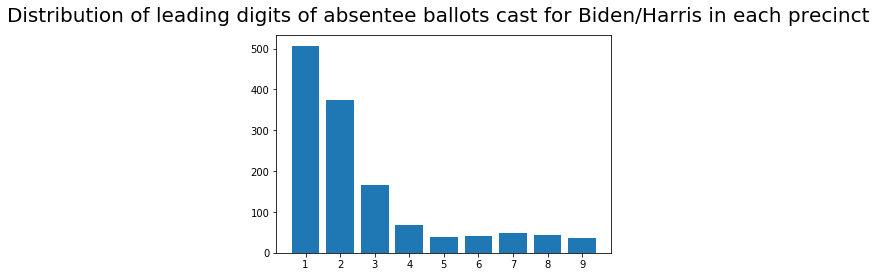

In [92]:
# get distribution of leading digits from absentee votes cast for Biden/Harris
data = [];
#absentee ballots
for child in root[5][1][1]:
    data.append(child.attrib)
    
df = pd.DataFrame.from_dict(data)
ld = get_leading_digit_dist(df['votes'])
    
plt.bar(range(len(ld)), list(ld.values()), align='center')
plt.xticks(range(len(ld)), list(ld.keys()))
plt.suptitle('Distribution of leading digits of absentee ballots cast for Biden/Harris in each precinct', fontsize=20)
plt.show()

hmm doesn't seem to match at all... could it have been made up???

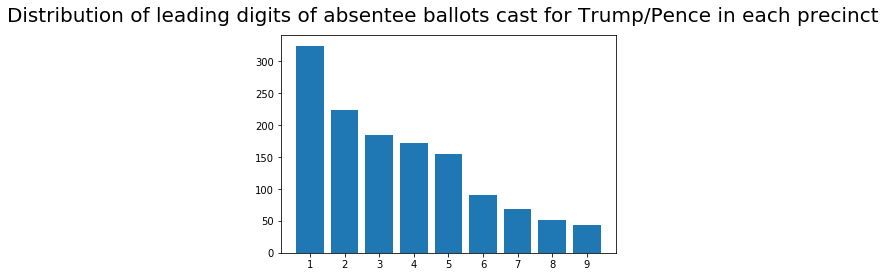

In [93]:
# get distribution of leading digits from absentee votes cast for Trump/Pence
data = [];
#absentee ballots
for child in root[5][2][1]:
    data.append(child.attrib)
    
df = pd.DataFrame.from_dict(data)
ld = get_leading_digit_dist(df['votes'])
    
plt.bar(range(len(ld)), list(ld.values()), align='center')
plt.xticks(range(len(ld)), list(ld.keys()))
plt.suptitle('Distribution of leading digits of absentee ballots cast for Trump/Pence in each precinct', fontsize=20)
plt.show()

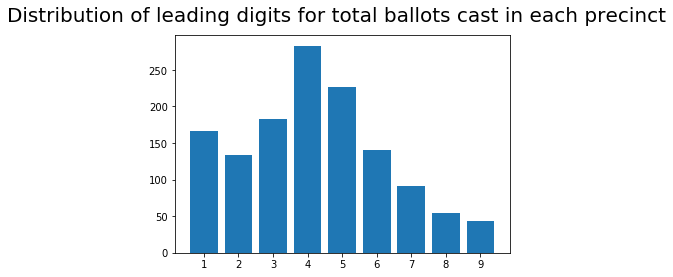

In [87]:
# get distribution of leading digits from total ballots cast in each precinct
data = [];
for child in root[4][0]:
    data.append(child.attrib)
    
df = pd.DataFrame.from_dict(data)
ld = get_leading_digit_dist(df['ballotsCast'])
    
plt.bar(range(len(ld)), list(ld.values()), align='center')
plt.xticks(range(len(ld)), list(ld.keys()))
plt.suptitle('Distribution of leading digits for total ballots cast in each precinct', fontsize=20)
plt.show()

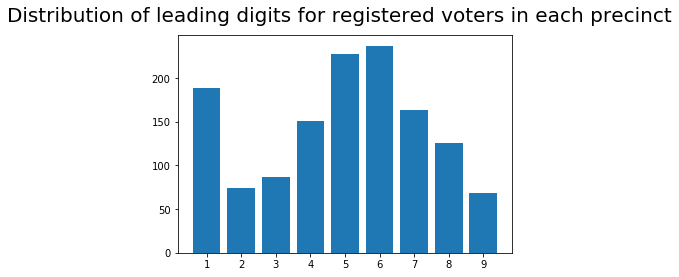

In [88]:
# get distribution of leading digits from total registered voters
data = [];
for child in root[5][0]:
    data.append(child.attrib)
    
df = pd.DataFrame.from_dict(data)
ld = get_leading_digit_dist(df['votes'])
    
plt.bar(range(len(ld)), list(ld.values()), align='center')
plt.xticks(range(len(ld)), list(ld.keys()))
plt.suptitle('Distribution of leading digits for registered voters in each precinct', fontsize=20)
plt.show()